In [104]:
import random 
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import open3d as o3d
from mpl_toolkits.mplot3d import Axes3D
import os
from scipy.ndimage import convolve


# Camera Calibration

In [105]:
# def calibrate_camera(calibration_dir_path):
#     """
#     Calibrates the camera using chessboard images from the specified directory.
    
#     Parameters:
#         calibration_dir_path (str): Path to the directory containing chessboard images.
    
#     Returns:
#         tuple: Camera intrinsic matrix (K), Distortion coefficients (dist), New undistorted camera matrix (K_undist)
#                (Returns None, None, None if calibration fails)
#     """
#     # Fetch all images
#     calibration_images = glob.glob(calibration_dir_path)

#     # Chessboard dimensions
#     chessboard_size = (8, 6)

#     # Criteria for corner refinement
#     criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 24, 0.001)

#     # Prepare object points
#     objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
#     objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)

#     # Arrays to store object points and image points
#     objpoints, imgpoints = [], []
#     gray, w, h = None, None, None

#     # Process each image
#     for i, fname in enumerate(calibration_images, start=1):
#         img = cv2.imread(fname)
#         if img is None:
#             print(f"Warning: Could not read image {fname}. Skipping.")
#             continue
        
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         h, w = img.shape[:2]

#         # Find chessboard corners
#         ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

#         if ret:
#             objpoints.append(objp)
#             corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
#             imgpoints.append(corners2)

#             # Draw and display the corners
#             img_with_corners = cv2.drawChessboardCorners(img, chessboard_size, corners2, ret)
#             img_with_corners_rgb = cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB)
#             plt.figure(figsize=(8, 6))
#             plt.imshow(img_with_corners_rgb)
#             plt.title(f"Chessboard Corners (Image {i})")
#             plt.axis('off')
#             plt.show()
    
#     # Calibrate the camera
#     if objpoints and imgpoints:
#         ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
#         print("Camera Intrinsic Matrix (K):\n", K)
#         print("\nDistortion Coefficients:\n", dist.ravel())
#         K_undist, roi = cv2.getOptimalNewCameraMatrix(K, dist, (w, h), 1, (w, h))
#         print("\nNew Undistorted Camera Matrix:\n", K_undist)
#         return K, dist, K_undist
#     else:
#         print("\nNo chessboard corners were detected in the images. Calibration failed.")
#         return None, None, None

# # --------------------------------------------------------------------------
# # Call the function as you did before (simple)

# # calibration_dir = r'F:\Final Year Project\FYP-3\Cheaker board pattern\Test\*.png'
# calibration_dir=r'F:\Final Year Project\FYP-3\Images\cal1\*.png'

# K, dist, K_undist = calibrate_camera(calibration_dir)

# # Optional check if calibration failed
# if K is None:
#     print("\n❌ Camera calibration was unsuccessful. Please check the images or the chessboard size.")

In [106]:
# left_image = cv2.imread(''r'F:\Final Year Project\FYP-3\Datasets\Lib\left4.png')
# right_image = cv2.imread(''r'F:\Final Year Project\FYP-3\Datasets\Lib\right4.png')
# left_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
# right_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

# undistorted_left = np.array([])
# undistorted_right = np.array([])
# gray_undistorted_left = np.array([])
# gray_undistorted_right = np.array([])

# # Undistort the left image
# undistorted_left = cv2.undistort(left_image, K, dist, None, K_undist)

# # Undistort the right image
# undistorted_right = cv2.undistort(right_image, K, dist, None, K_undist)

# # Undistort the left gray image
# gray_undistorted_left = cv2.undistort(left_gray, K, dist, None, K_undist)

# # Undistort the right gray image
# gray_undistorted_right = cv2.undistort(right_gray, K, dist, None, K_undist)

# # Save or display the results
# cv2.imwrite(''r'F:\Final Year Project\FYP-3\Results\Triangulation\undistorted_left2.png', undistorted_left)
# cv2.imwrite(''r'F:\Final Year Project\FYP-3\Results\Triangulation\undistorted_right2.png', undistorted_right)

# # Display undistorted images separately
# plt.figure(figsize=(10, 5))

# plt.imshow(undistorted_left)
# # plt.title('Undistorted Left Image')
# plt.axis('off')
# plt.show()

# plt.figure(figsize=(10, 5))
# plt.imshow(undistorted_right)
# # plt.title('Undistorted Right Image')
# plt.axis('off')
# plt.show()


# Harris corner detector

In [107]:
def harris_corner_detector(image_path, result_dir, suffix="", block_size=2, ksize=5, k=0.06):
    # Load and convert image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    
    # Compute Harris corner response
    dst = cv2.cornerHarris(gray, block_size, ksize, k)
    dst = cv2.dilate(dst, None)
    
    # Threshold for an optimal value
    corners = np.argwhere(dst > 0.03 * dst.max())  # Get corner coordinates (y, x)

    # Convert to RGB for display
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Generate random colors for each detected corner
    num_corners = corners.shape[0]
    colors = np.random.rand(num_corners, 3)

    # Plot and save the image with detected corners
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb_image)
    plt.scatter(corners[:, 1], corners[:, 0], c=colors, s=50)
    plt.axis('off')
    # Save the result
    os.makedirs(result_dir, exist_ok=True)  # Ensure directory exists
    filename = os.path.splitext(os.path.basename(image_path))[0] + suffix + ".png"
    save_path = os.path.join(result_dir, filename)
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.show()

    return corners  # Return detected corner coordinates

# SIFT

In [108]:
def sift_feature_detector(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    
    img_sift = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  
    
    return keypoints, descriptors




# ORB

In [109]:
def orb_feature_detector(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    
    img_orb = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
      
    return keypoints, descriptors



In [110]:


def plot_keypoints(image_path, points, result_path, point_size=4, suffix=""):
    """
    Plots corners or keypoints on an image with uniform size and random colors, then saves the result.
    
    Args:
        image_path (str): Path to the input image.
        points (list or numpy.ndarray): List of cv2.KeyPoint objects or an array of corner points (N x 2).
        result_path (str): Directory to save the output image.
        point_size (int): Size of the circles representing points.
        suffix (str): Suffix for the output filename.
    
    Returns:
        None
    """
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("The input image is None. Check if the image path is correct.")
    
    # Ensure the image is in BGR format
    if len(image.shape) == 2:  # Grayscale image
        img_with_points = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    else:
        img_with_points = image.copy()
    
    # Plot each point
    for pt in points:
        color = [random.randint(0, 255) for _ in range(3)]
        
        # Handle cv2.KeyPoint or (x, y) coordinates
        if isinstance(pt, cv2.KeyPoint):
            center = (int(pt.pt[0]), int(pt.pt[1]))
        else:
            center = (int(pt[0]), int(pt[1]))  # For corner points
        
        cv2.circle(img_with_points, center, point_size, color, -1)
    
    # Ensure the result directory exists
    os.makedirs(result_path, exist_ok=True)
    
    # Save the image with the given suffix
    output_filename = os.path.join(result_path, f"points_{suffix}.jpg")
    cv2.imwrite(output_filename, img_with_points)
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img_with_points, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [111]:
def detect_and_plot_corners(left_image, right_image, result_dir):
    """
    Detect corners using Harris, SIFT, and ORB methods, print the number of detected corners,
    and save visualizations.

    Parameters:
    - left_image: The left input image.
    - right_image: The right input image.
    - result_dir: Directory to save results.
    """

    # Ensure result directory exists
    os.makedirs(result_dir, exist_ok=True)
    print("Harris Corner Detection")
    # Harris Corner Detection
    corner_harris_left = harris_corner_detector(left_image, result_dir, suffix="_left_harris")
    corner_harris_right = harris_corner_detector(right_image, result_dir, suffix="_right_harris")

    print('No of Harris detected corners in left image:', len(corner_harris_left))
    print('No of Harris detected corners in right image:', len(corner_harris_right))
    

    print("SIFT")
    # SIFT Feature Detection
    corner_sift_left, descriptor_sift_left = sift_feature_detector(left_image)
    corner_sift_right, descriptor_sift_right = sift_feature_detector(right_image)

    print('No of SIFT detected corners in left image:', len(corner_sift_left))
    print('No of SIFT detected corners in right image:', len(corner_sift_right))

    plot_keypoints(left_image, corner_sift_left, result_dir, suffix="_left_sift")
    plot_keypoints(right_image, corner_sift_right, result_dir, suffix="_right_sift")

    print("ORB")

    # ORB Feature Detection
    corner_orb_left, descriptor_orb_left = orb_feature_detector(left_image)
    corner_orb_right, descriptor_orb_right = orb_feature_detector(right_image)

    print('No of ORB detected corners in left image:', len(corner_orb_left))
    print('No of ORB detected corners in right image:', len(corner_orb_right))

    plot_keypoints(left_image, corner_orb_left, result_dir, suffix="_left_orb")
    plot_keypoints(right_image, corner_orb_right, result_dir, suffix="_right_orb")

    return corner_harris_left,corner_harris_right,corner_sift_left, descriptor_sift_left,corner_sift_right, descriptor_sift_right,corner_orb_left, descriptor_orb_left,corner_orb_right, descriptor_orb_right
    

# Matching

## Brute force

In [112]:
def match_bf(descriptors1, descriptors2):
    """
    Perform brute-force matching using BFMatcher.
    """
    bf = cv2.BFMatcher()
    matches_12 = bf.knnMatch(descriptors1, descriptors2, k=2)  # Match from img1 to img2
    matches_21 = bf.knnMatch(descriptors2, descriptors1, k=2)  # Match from img2 to img1
    return matches_12, matches_21




## FLANN

In [113]:
def match_flann(descriptors1, descriptors2):
    """
    Perform feature matching using FLANN-based matcher.
    """
    index_params = dict(algorithm=1, trees=5)  # FLANN with KDTree for SIFT/SURF
    search_params = dict(checks=50)  # Number of times the tree is recursively traversed

    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches_12 = flann.knnMatch(descriptors1, descriptors2, k=2)  # Match from img1 to img2
    matches_21 = flann.knnMatch(descriptors2, descriptors1, k=2)  # Match from img2 to img1
    return matches_12, matches_21



In [114]:
def filter_matches(matches_12, matches_21):
    """
    Apply the 1NN/2NN ratio test and perform cross-validation.
    """
    good_matches = []
    
    for m, n in matches_12:
        if m.distance < 0.75 * n.distance:  # Apply ratio test
            query_idx = m.queryIdx
            train_idx = m.trainIdx
            
            # Perform cross-validation check (reverse matching)
            reverse_matches = [rm for rm, rn in matches_21 if rm.queryIdx == train_idx and rm.trainIdx == query_idx]
            if reverse_matches:
                good_matches.append(m)
    
    return good_matches

In [115]:
def plot_matches(left_image, keypoints1, right_image, keypoints2, matches, gap=40, save_path=None, suffix=""):
    """
    Plot the matched keypoints between two images with random colored lines and circles, with a gap between the images, and save the result.

    Parameters:
    - left_image, right_image: Input image paths.
    - keypoints1, keypoints2: Keypoints detected in both images.
    - matches: List of good matches.
    - gap: Space (in pixels) between the two images.
    - save_path: Path to save the output image (if None, does not save).
    - suffix: Optional suffix to add to the filename.
    """
    left_image = cv2.imread(left_image)
    right_image = cv2.imread(right_image)

    # Get image dimensions
    h1, w1 = left_image.shape[:2]
    h2, w2 = right_image.shape[:2]

    # Create an output image with a gap
    canvas_height = max(h1, h2)
    canvas_width = w1 + gap + w2
    output_img = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

    # Convert grayscale images to BGR if necessary
    img1 = cv2.cvtColor(left_image, cv2.COLOR_GRAY2BGR) if len(left_image.shape) == 2 else left_image
    img2 = cv2.cvtColor(right_image, cv2.COLOR_GRAY2BGR) if len(right_image.shape) == 2 else right_image

    # Place images on the canvas with the specified gap
    output_img[:h1, :w1] = img1
    output_img[:h2, w1 + gap : w1 + gap + w2] = img2

    # Draw matches with random colors and circles
    for match in matches:
        pt1 = tuple(map(int, keypoints1[match.queryIdx].pt))
        pt2 = tuple(map(int, keypoints2[match.trainIdx].pt))
        pt2 = (pt2[0] + w1 + gap, pt2[1])  # Adjust for second image's position with gap

        color = np.random.randint(0, 255, (3,)).tolist()  # Generate random color
        
        cv2.line(output_img, pt1, pt2, color, 1)
        cv2.circle(output_img, pt1, 5, color, -1)
        cv2.circle(output_img, pt2, 5, color, -1)

    # Show the image
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    # Save if required
    if save_path:
        filename = os.path.join(save_path, f"matches{suffix}.png")
        plt.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=300)
        print(f"Saved match visualization at: {filename}")

    plt.show()


In [116]:
def match_and_filter(descriptors1, descriptors2, method="bf", ratio_test=0.75):
    """
    Match descriptors using BFMatcher or FLANN, apply Lowe's ratio test, and return good matches.
    """
    if descriptors1 is None or descriptors2 is None:
        print("Descriptors are None, skipping matching.")
        return []

    if method == "bf":
        bf = cv2.BFMatcher(cv2.NORM_L2 if descriptors1.dtype == np.float32 else cv2.NORM_HAMMING, crossCheck=False)
        matches = bf.knnMatch(descriptors1, descriptors2, k=2)
    elif method == "flann":
        index_params = dict(algorithm=1, trees=5) if descriptors1.dtype == np.float32 else dict(algorithm=6)
        search_params = dict(checks=50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)
        matches = flann.knnMatch(descriptors1, descriptors2, k=2)
    else:
        raise ValueError("Invalid method. Use 'bf' or 'flann'.")

    good_matches = [m for m, n in matches if m.distance < ratio_test * n.distance]
    print(f"Method: {method.upper()}, Total Matches: {len(matches)}, Good Matches: {len(good_matches)}")
    return good_matches

In [117]:
def perform_feature_matching(left_image, right_image,corner_harris_left, corner_harris_right, 
     keypoints1_sift, descriptor_sift_left, keypoints2_sift, descriptor_sift_right, 
     keypoints1_orb, descriptor_orb_left, keypoints2_orb, descriptor_orb_right, result_dir):
    """
    Perform feature matching using BF and FLANN for SIFT and ORB descriptors, then draw and display matches.
    """
   

    # Perform matching
    matches_sift_bf = match_and_filter(descriptor_sift_left, descriptor_sift_right, method="bf")
    matches_sift_flann = match_and_filter(descriptor_sift_left, descriptor_sift_right, method="flann")
    
    # Draw matches using plot_matches function
    plot_matches(left_image, keypoints1_sift, right_image, keypoints2_sift, matches_sift_bf, save_path=result_dir, suffix="_sift_bf")
    plot_matches(left_image, keypoints1_sift, right_image, keypoints2_sift, matches_sift_flann, save_path=result_dir, suffix="_sift_flann")

    return matches_sift_bf,matches_sift_flann


In [118]:
def extract_matched_points(keypoints1, keypoints2, matches):
    """
    Extract matched keypoints from the images based on matches.
    """
    points1 = np.array([keypoints1[m.queryIdx].pt for m in matches])
    points2 = np.array([keypoints2[m.trainIdx].pt for m in matches])
    return points1, points2

In [119]:
def compute_epipolar_lines(F, points, image_shape, which_image):
    """
    Compute the epipolar lines in one image given points from the other image.
    """
    lines = cv2.computeCorrespondEpilines(points.reshape(-1, 1, 2), which_image, F)
    lines = lines.reshape(-1, 3)
    return lines


In [120]:
def draw_epipolar_lines(img1, lines, pts1, pts2):
    """
    Draws epipolar lines on the given image.

    Parameters:
        img1 (numpy.ndarray): The input image on which the epipolar lines will be drawn.
        lines (numpy.ndarray): The epipolar lines associated with img1.
        pts1 (numpy.ndarray): Keypoints in img1.
        pts2 (numpy.ndarray): Corresponding keypoints in img2.

    Returns:
        numpy.ndarray: The image with epipolar lines drawn.
    """
    img1 = img1.copy()
    h, w, _ = img1.shape
    colors = [tuple(np.random.randint(0, 255, 3).tolist()) for _ in range(len(lines))]

    for line, pt1, color in zip(lines, pts1, colors):
        x0, y0 = map(int, [0, -line[2] / line[1]])
        x1, y1 = map(int, [w, -(line[2] + line[0] * w) / line[1]])

        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 1)
        img1 = cv2.circle(img1, tuple(map(int, pt1.ravel())), 5, color, -1)  # Ensure correct point format

    return img1


In [121]:
def display_images(img1, img2, save_path=None, suffix="", gap_size=20):
    """
    Display the images with epipolar lines side by side with a gap and save the result.

    Parameters:
    - img1, img2: Images to display (NumPy arrays).
    - save_path: Path to save the combined image (if None, does not save).
    - suffix: Optional suffix to add to the filename.
    - gap_size: Size of the gap (in pixels) between the two images.
    """
    # Create a black (zero-pixel) gap with the same height as the images
    gap = np.zeros((img1.shape[0], gap_size, 3), dtype=np.uint8)
    
    # Combine images with the gap in between
    combined_img = np.hstack((img1, gap, img2))
    
    # Display the combined image
    plt.figure(figsize=(14, 6))
    plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
    # plt.title('Left and Right Images with Epipolar Lines')
    plt.axis('off')

    # Save the combined image if a save path is provided
    if save_path:
        filename = os.path.join(save_path, f"epipolar_lines{suffix}.png")
        cv2.imwrite(filename, combined_img)
        print(f"Saved combined image at: {filename}")

    plt.show()

In [122]:
def plot_inliers_and_matches(image1, image2, points1, points2, result_dir, suffix="", inliers_mask=None, gap=20):
    """
    Plots inlier matches between two images with a gap between them.

    Parameters:
    - image1, image2: Input images (numpy arrays).
    - points1, points2: Corresponding points (Nx2 numpy arrays).
    - result_dir: Directory to save the plot.
    - suffix: Suffix for the saved filename.
    - inliers_mask: Optional mask (N elements) indicating which matches are inliers.
    - gap: Number of pixels to leave between the two images.
    """
    if inliers_mask is not None:
        inliers_mask = inliers_mask.ravel().astype(bool)
        points1 = points1[inliers_mask]
        points2 = points2[inliers_mask]

    height1, width1 = image1.shape[:2]
    height2, width2 = image2.shape[:2]
    height = max(height1, height2)
    total_width = width1 + gap + width2

    # Create canvas with gap
    canvas = np.zeros((height, total_width, 3), dtype=np.uint8)
    canvas[:height1, :width1] = image1
    canvas[:height2, width1 + gap: width1 + gap + width2] = image2

    # Plot
    plt.figure(figsize=(12, 6))
    plt.imshow(canvas[..., ::-1])  # BGR to RGB
    plt.axis('off')

    for p1, p2 in zip(points1, points2):
        pt1 = (int(p1[0]), int(p1[1]))
        pt2 = (int(p2[0] + width1 + gap), int(p2[1]))  # Shift by width1 + gap

        color = np.random.rand(3,)
        plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color=color, linewidth=1)
        plt.scatter(pt1[0], pt1[1], color=color, s=10)
        plt.scatter(pt2[0], pt2[1], color=color, s=10)

    os.makedirs(result_dir, exist_ok=True)
    output_path = os.path.join(result_dir, f"matches{suffix}.png")
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

In [123]:

def epipolar_lines(left_image, right_image, points1, points2, result_dir, ransac_threshold=0.01):
    """
    Computes the fundamental matrix using both 8-point and RANSAC algorithms,
    draws epipolar lines on images, and displays the results.
    
    Parameters:
    - image1, image2: Input images (grayscale or color)
    - points1, points2: Corresponding points in the two images
    - result_dir: Directory to save the output images
    - ransac_threshold: Threshold for RANSAC in cv2.findFundamentalMat
    """
    image1=cv2.imread(left_image)
    image2=cv2.imread(right_image)
    # Compute fundamental matrix using 8-point algorithm
    F_8point, mask_8point = cv2.findFundamentalMat(points1, points2, cv2.FM_8POINT)
    print("Fundamental Matrix (8-point):\n", F_8point)

    # Compute fundamental matrix using RANSAC
    F_ransac, inliers_ransac = cv2.findFundamentalMat(points1, points2, cv2.FM_RANSAC, ransacReprojThreshold=ransac_threshold)
    print("Fundamental Matrix (RANSAC):\n", F_ransac)
    print("RANSAC Number of Inliers:\n", len(inliers_ransac))

    # Compute and draw epipolar lines for 8-point algorithm
    lines1_8point = compute_epipolar_lines(F_8point, points2, image1.shape[::-1], 2)
    lines2_8point = compute_epipolar_lines(F_8point, points1, image2.shape[::-1], 1)
    
    img1_with_lines_8point = draw_epipolar_lines(image1, lines1_8point, points1, points2)
    img2_with_lines_8point = draw_epipolar_lines(image2, lines2_8point, points1, points2)
    
    print("8-point Algorithum")
    display_images(img1_with_lines_8point, img2_with_lines_8point, result_dir, "Epipolar lines (8-point)")

    # Compute and draw epipolar lines for RANSAC
    lines1_ransac = compute_epipolar_lines(F_ransac, points2, image1.shape[::-1], 2)
    lines2_ransac = compute_epipolar_lines(F_ransac, points1, image2.shape[::-1], 1)
    
    img1_with_lines_ransac = draw_epipolar_lines(image1, lines1_ransac, points1, points2)
    img2_with_lines_ransac = draw_epipolar_lines(image2, lines2_ransac, points1, points2)

    print("RANSAC")
    display_images(img1_with_lines_ransac, img2_with_lines_ransac, result_dir, "Epipolar lines (RANSAC)")

    print("Out liers removed")

    plot_inliers_and_matches(image1, image2, points1, points2, result_dir, suffix="_inliers", inliers_mask=inliers_ransac)

    return F_8point,F_ransac





# Essential Matrix

In [124]:
def compute_pose_and_projections(K, F, pts1, pts2):
    """
    Computes essential matrix, camera pose (R, t), and projection matrices P1 and P2.
    
    Args:
        K (np.array): Camera intrinsic matrix.
        F (np.array): Fundamental matrix.
        pts1 (np.array): Matched points from the first image.
        pts2 (np.array): Matched points from the second image.

    Returns:
        E (np.array): Essential matrix.
        R (np.array): Rotation matrix.
        t (np.array): Translation vector.
        P1 (np.array): Projection matrix for first camera.
        P2 (np.array): Projection matrix for second camera.
    """
    # Compute the Essential matrix
    E = np.dot(K.T, np.dot(F, K))

    # Recover the pose (R and t)
    _, R, t, mask_pose = cv2.recoverPose(E, pts1, pts2, K)

    # Create [R|t] and [I|0] matrices
    R_t_0 = np.hstack((np.eye(3), np.zeros((3, 1))))   # Identity rotation and zero translation
    R_t_1 = np.hstack((R, t))                          # Estimated rotation and translation

    # Compute Projection matrices
    P1 = np.dot(K, R_t_0)
    P2 = np.dot(K, R_t_1)

    # Printing everything
    print("="*50)
    print("Essential Matrix (E):\n", E)
    print("="*50)
    print("Intrinsic Matrix (k):\n", K)
    print("="*50)
    print("Extrinsic Metrix 1 (M1):\n", R_t_0)
    print("="*50)
    print("Extrinsic Matrix (M2):\n", R_t_1)
    print("="*50)
    print("First Projection Matrix (P1):\n", P1)
    print("="*50)
    print("Second Projection Matrix (P2):\n", P2)
    print("="*50)

    return E, R, t, P1, P2

# Triangulation

In [125]:
def triangulate(P1, P2, pts1, pts2, undistorted_left):
    """
    Triangulate 3D points from two views and extract corresponding colors from the left image.
    
    Args:
        P1 (np.ndarray): Projection matrix of the first camera (3x4).
        P2 (np.ndarray): Projection matrix of the second camera (3x4).
        pts1 (np.ndarray): Matched points from image 1 (Nx2).
        pts2 (np.ndarray): Matched points from image 2 (Nx2).
        undistorted_left (np.ndarray): The undistorted left image (used for color extraction).
        
    Returns:
        points_3d (np.ndarray): Triangulated 3D points (Nx3).
        pc_color (np.ndarray): Corresponding colors for each 3D point (Nx3).
        pc_points (np.ndarray): 3D points as float32 (Nx3).
    """
    # Ensure input points are (2, N)
    pts1 = pts1.T  # Shape (2, N)
    pts2 = pts2.T

    # Perform triangulation to get homogeneous 4D points
    points_4d = cv2.triangulatePoints(P1, P2, pts1, pts2)

    # Convert from homogeneous coordinates to 3D (by dividing by the 4th coordinate)
    points_3d = (points_4d[:3] / points_4d[3]).T  # Shape (N, 3)

    if points_3d.shape[1] != 3:
        raise ValueError("Triangulated points must have shape (N, 3)")

    # Ensure undistorted image is in RGB format for color extraction
    if len(undistorted_left.shape) == 2 or undistorted_left.shape[2] == 1:
        imgLU = cv2.cvtColor(undistorted_left, cv2.COLOR_GRAY2BGR)
    else:
        imgLU = cv2.cvtColor(undistorted_left, cv2.COLOR_BGR2RGB)

    # Initialize color array
    pc_color = []

    for pt in pts1.T:
        x, y = int(round(pt[0])), int(round(pt[1]))
        if 0 <= y < imgLU.shape[0] and 0 <= x < imgLU.shape[1]:
            color = imgLU[y, x] / 255.0  # Normalize color to [0, 1]
            pc_color.append(color)
        else:
            pc_color.append([0, 0, 0])  # Default black if out of bounds

    pc_color = np.array(pc_color, dtype=np.float32)
    pc_points = np.array(points_3d, dtype=np.float32)

    print(f"Number of 3D points: {len(points_3d)}")
    print(f"Color array shape: {pc_color.shape}")

    return points_3d, pc_color, pc_points


In [126]:
def plot_3d_points(points_3d, pc_color, marker_size=5):
    """
    Plots 3D points with given colors.

    Parameters:
    - points_3d: (N, 3) array-like, 3D coordinates of points
    - pc_color: color values for each point
    - marker_size: size of the scatter points (default is 5)
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    X = points_3d[:, 0]
    Y = points_3d[:, 1]
    Z = points_3d[:, 2]

    ax.scatter(X, Y, Z, c=pc_color, s=marker_size)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

In [127]:
def visualize_point_cloud(pc_points, pc_color, zoom=0.5,
                           front=[0, 0, -1],
                           lookat=[0, 0, 0],
                           up=[0, -1, 0]):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(pc_points)
    pcd.colors = o3d.utility.Vector3dVector(pc_color)

    o3d.visualization.draw_geometries([pcd],
                                      zoom=zoom,
                                      front=front,
                                      lookat=lookat,
                                      up=up)

# Main


Harris Corner Detection


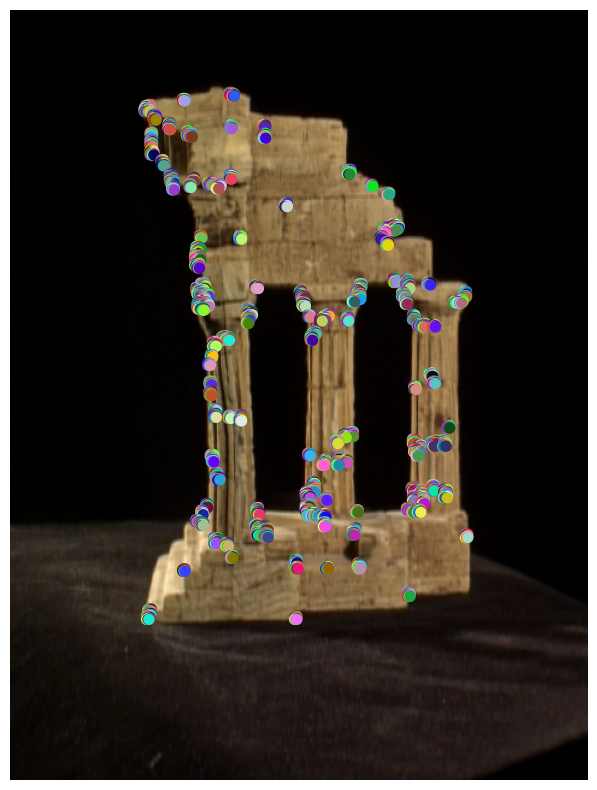

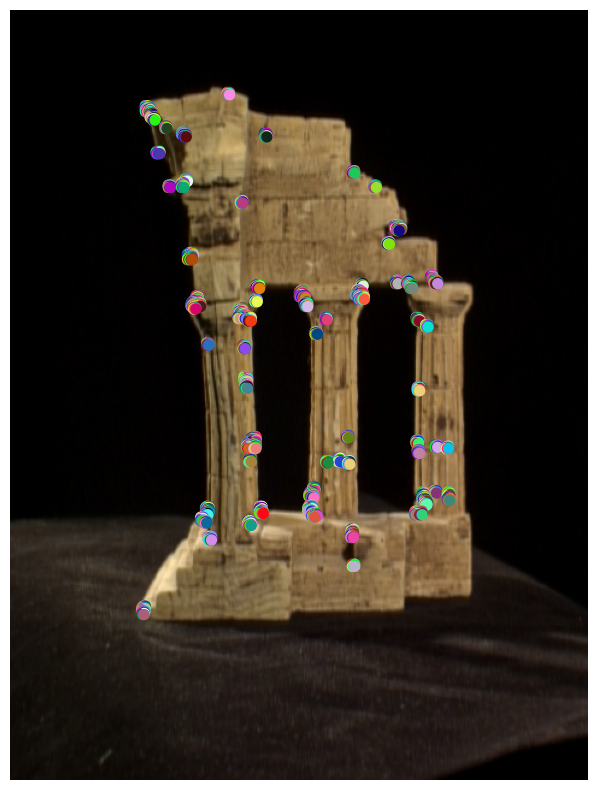

No of Harris detected corners in left image: 2366
No of Harris detected corners in right image: 1189
SIFT
No of SIFT detected corners in left image: 781
No of SIFT detected corners in right image: 792


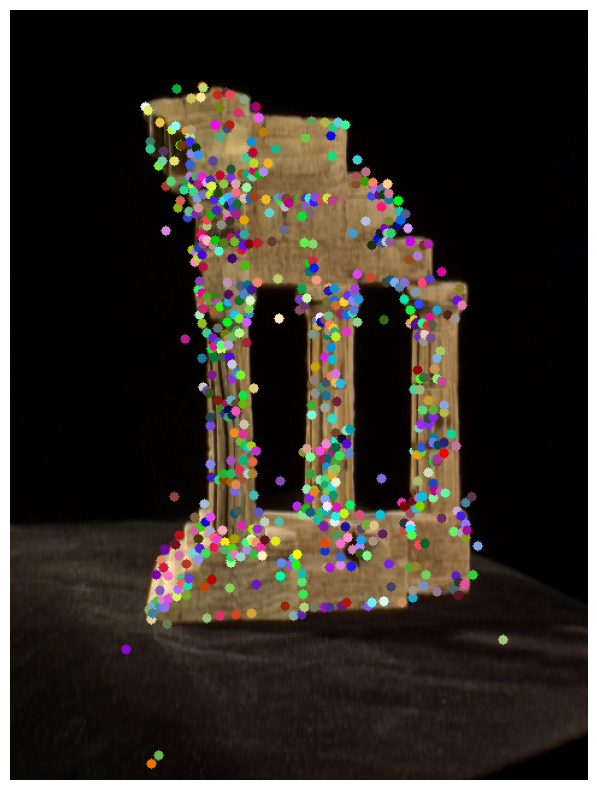

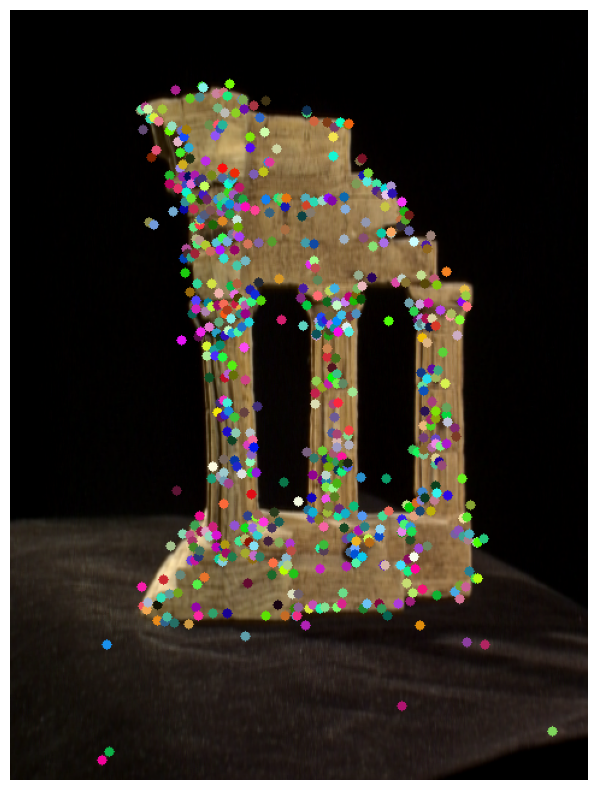

ORB
No of ORB detected corners in left image: 500
No of ORB detected corners in right image: 500


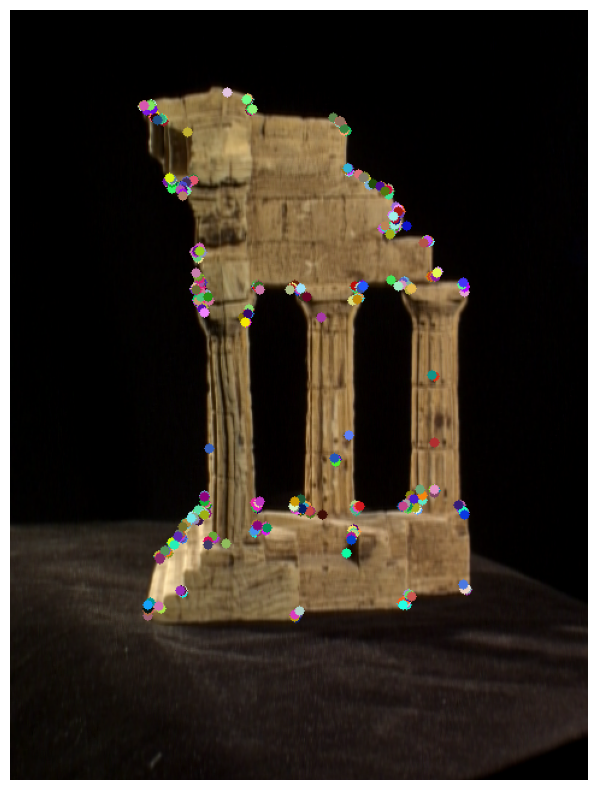

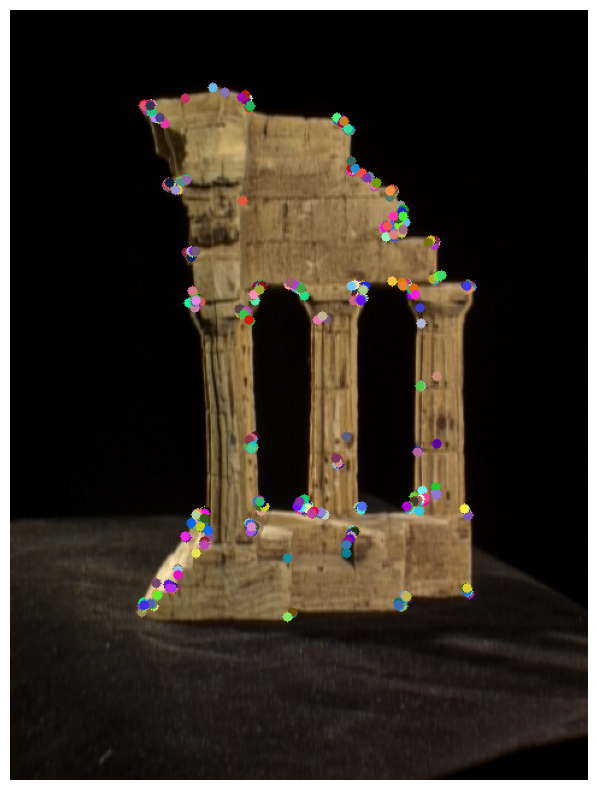

Method: BF, Total Matches: 781, Good Matches: 462
Method: FLANN, Total Matches: 781, Good Matches: 464
Saved match visualization at: F:\Final Year Project\FYP-3\Results\Triangulation\matches_sift_bf.png


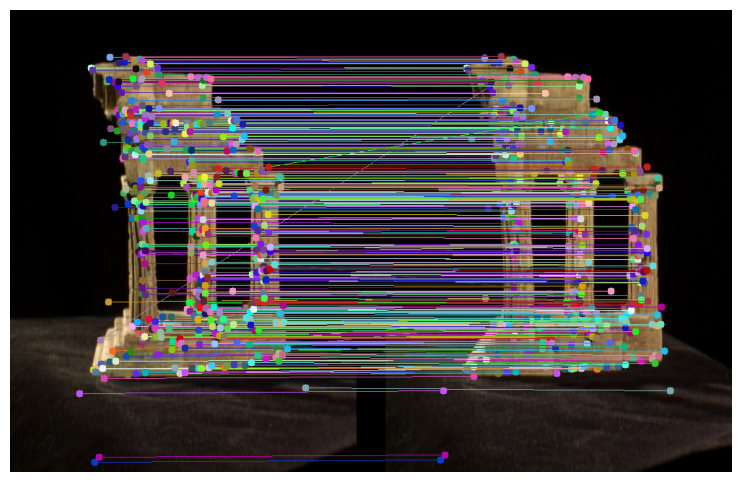

Saved match visualization at: F:\Final Year Project\FYP-3\Results\Triangulation\matches_sift_flann.png


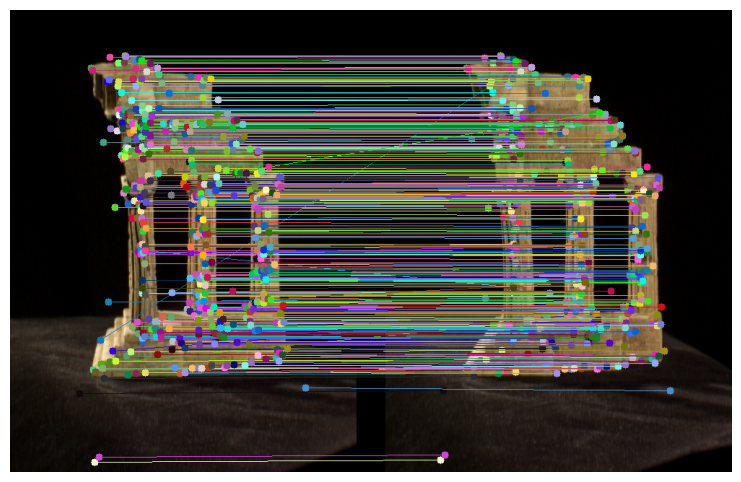

Fundamental Matrix (8-point):
 [[-1.35746778e-06 -2.02925025e-04  1.01174195e-01]
 [ 2.12225492e-04 -3.70405253e-06 -2.25348413e-02]
 [-1.05801814e-01  2.24054255e-02  1.00000000e+00]]
Fundamental Matrix (RANSAC):
 [[-2.13335140e-07  5.56596976e-06  2.94878786e-03]
 [ 2.85792181e-05 -2.72222968e-07 -5.85476447e-01]
 [-7.25280255e-03  5.77675956e-01  1.00000000e+00]]
RANSAC Number of Inliers:
 464
8-point Algorithum
Saved combined image at: F:\Final Year Project\FYP-3\Results\Triangulation\epipolar_linesEpipolar lines (8-point).png


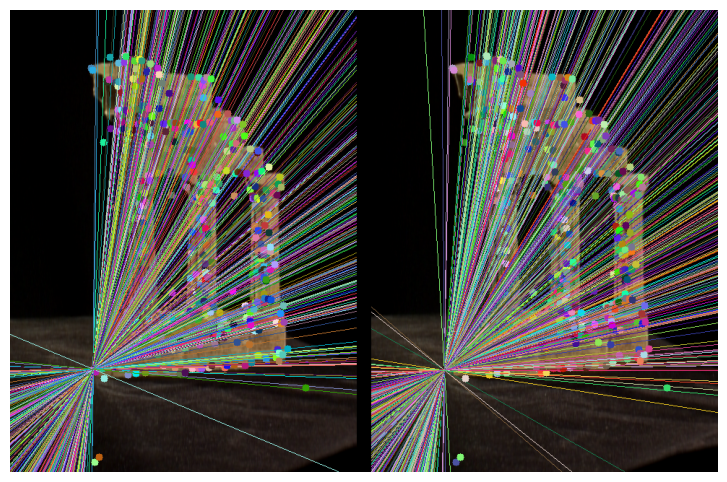

RANSAC
Saved combined image at: F:\Final Year Project\FYP-3\Results\Triangulation\epipolar_linesEpipolar lines (RANSAC).png


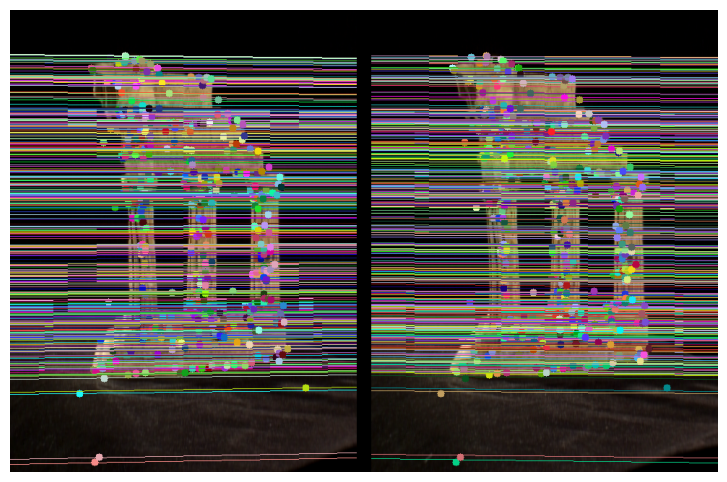

Out liers removed


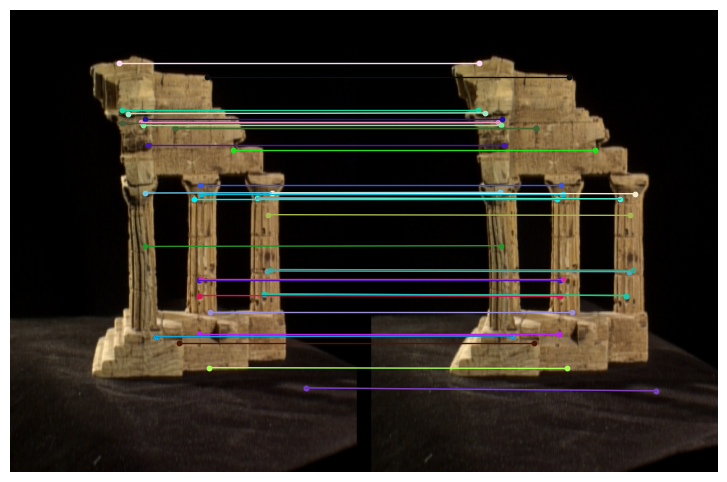

Essential Matrix (E):
 [[-4.93148957e-01  1.29129294e+01  6.47441562e+00]
 [ 6.63031676e+01 -6.33836012e-01 -8.80297174e+02]
 [-3.98263385e-01  8.83940834e+02  2.85397439e-01]]
Intrinsic Matrix (k):
 [[1.5204e+03 0.0000e+00 3.0232e+02]
 [0.0000e+00 1.5259e+03 2.4687e+02]
 [0.0000e+00 0.0000e+00 1.0000e+00]]
Extrinsic Metrix 1 (M1):
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
Extrinsic Matrix (M2):
 [[ 9.95948610e-01 -6.92147470e-03  8.96574522e-02 -9.99866390e-01]
 [ 6.91405816e-03  9.99976020e-01  3.93298044e-04 -7.34909032e-03]
 [-8.96580245e-02  2.28192199e-04  9.95972583e-01  1.46011424e-02]]
First Projection Matrix (P1):
 [[1.5204e+03 0.0000e+00 3.0232e+02 0.0000e+00]
 [0.0000e+00 1.5259e+03 2.4687e+02 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00]]
Second Projection Matrix (P2):
 [[ 1.48713485e+03 -1.04544231e+01  4.37417622e+02 -1.51578264e+03]
 [-1.15837152e+01  1.52591974e+03  2.46475885e+02 -7.60939289e+00]
 [-8.96580245e-02  2.28192199e-04  9.95972583e-01  1.4

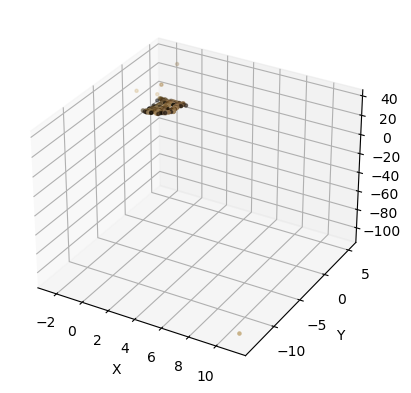

In [128]:
left_image = ''r'F:\Final Year Project\FYP-3\Datasets\Lib\left8.png'
right_image = ''r'F:\Final Year Project\FYP-3\Datasets\Lib\right8.png'
result_dir = r"F:\Final Year Project\FYP-3\Results\Triangulation"

K = np.matrix('1520.40 0.00 302.32; 0.00 1525.90 246.87; 0.00 0.00 1.00')

(corner_harris_left, corner_harris_right, keypoints1_sift, descriptor_sift_left, keypoints2_sift, descriptor_sift_right,keypoints1_orb, descriptor_orb_left, keypoints2_orb, descriptor_orb_right) = detect_and_plot_corners(left_image, right_image, result_dir)

match_bff,match_flann=perform_feature_matching(left_image, right_image,corner_harris_left, corner_harris_right, keypoints1_sift, descriptor_sift_left, keypoints2_sift, descriptor_sift_right, keypoints1_orb, descriptor_orb_left, keypoints2_orb, descriptor_orb_right, result_dir)

points1, points2 = extract_matched_points(keypoints1_sift, keypoints2_sift, match_flann)


F_8point,F_Ransac=epipolar_lines(left_image, right_image, points1, points2, result_dir)

E, R, t, P1, P2 = compute_pose_and_projections(K, F_Ransac, points1, points2)

left_image = cv2.imread(left_image)  # Replace with the actual path


points_3d, pc_color ,pc_points= triangulate(P1, P2, points1, points2, left_image)

plot_3d_points(points_3d, pc_color)

visualize_point_cloud(pc_points, pc_color)

